In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings

warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
tianjin = '117.4961975657171,37.86803012379458,7.296245301137998 119.8081837995413,37.9250916349774,-34.2681049860788 119.8416643486643,39.32481316399956,-31.12524274095152 117.9501096884913,39.37523731857854,39.41212136434525 117.4961975657171,37.86803012379458,7.296245301137998'



coord_list = tianjin.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [3]:
df_test = pd.read_csv("voy_path/COSCO_FOS_VRKR6_24.csv")
df_test

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.4761,34.0970,20.2,282.0,2022-10-31 01:44:32.801828,2022-10-30 16:41:25,2022-10-30 01:55:08,under way using engine,235.557924,529.149365
1,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.4315,34.1047,20.2,282.0,2022-10-31 01:49:35.660712,2022-10-30 16:48:08,2022-10-30 01:55:08,under way using engine,238.931185,536.726944
2,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3895,34.1077,20.2,271.0,2022-10-31 01:54:38.504486,2022-10-30 16:54:25,2022-10-30 01:55:08,under way using engine,242.321724,544.343338
3,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3598,34.1082,20.1,271.0,2022-10-31 01:59:42.326869,2022-10-30 16:58:50,2022-10-30 01:55:08,under way using engine,244.800071,545.915560
4,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3213,34.1087,20.2,271.0,2022-10-31 02:04:44.283430,2022-10-30 17:04:31,2022-10-30 01:55:08,under way using engine,248.026798,557.159024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8247,35.0773,0.0,91.0,2022-11-04 20:13:03.886599,2022-11-04 11:09:51,2022-11-04 11:07:05,under way using engine,11.985248,NaN
474,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8246,35.0772,0.0,91.0,2022-11-04 20:18:07.878970,2022-11-04 11:15:24,2022-11-04 11:07:05,under way using engine,11.973778,NaN
475,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0774,0.1,91.0,2022-11-04 20:58:30.521894,2022-11-04 11:57:20,2022-11-04 11:49:08,under way using engine,11.997099,957.274033
476,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0775,0.0,91.0,2022-11-04 21:03:31.914746,2022-11-04 12:00:35,2022-11-04 12:01:08,under way using engine,12.008209,NaN


In [4]:
# if Point(LONGITUDE, LATITUDE).within(poly):

In [5]:
df_test.sort_values(by="timestamp", ignore_index=True, inplace=True)

In [6]:
for idx in df_test.index:
    LONGITUDE = df_test.loc[idx, "longitude"]
    LATITUDE = df_test.loc[idx, "latitude"]
    heading = df_test.loc[idx, "heading"]
    speed = df_test.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
        

167


In [7]:
df_test_2 = df_test.loc[idx:,]
df_test_2.reset_index(inplace=True)

In [8]:
# df_test_2.to_csv("voy_path/COSCO_test.csv", encoding="utf-8 sig", header=True, index=False)

In [9]:
distance = 0
for idx in df_test_2.index:
    if idx != 0:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        distance += haversine(current_coord, previous_current_coord, unit="km")

In [10]:
distance

1389.7275616339807

In [11]:
1348.5265119662952 / 20

67.42632559831476

In [12]:
overall_length = 1348.5265119662952
segment_length = overall_length/20

In [13]:
overall_length = distance
segment_length = overall_length/20

In [14]:
segment_length

69.48637808169903

In [15]:
temp_accu_length = 0
segmenting_index_list = []
for idx in df_test_2.index:
    
    if idx == 0:
        previous_length = 0
    else:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        current_length = haversine(current_coord, previous_current_coord, unit="km")
        temp_accu_length += current_length
        
        if temp_accu_length >= segment_length:
            print(temp_accu_length)
#             segmenting_index_list.append(idx)
            
            
            length_error_1 = temp_accu_length - segment_length
            length_error_2 = temp_accu_length - segment_length - previous_length
            if length_error_1 > length_error_2:
                segmenting_index_list.append(idx)
            else:
                segmenting_index_list.append(idx - 1)
                
            
            temp_accu_length = 0
            
        previous_length = current_length
segmenting_index_list.append(df_test_2.index[-1])


71.47502926460479
92.63554206974845
70.68339235807801
71.76136468162034
70.47998578851839
72.73619273463741
71.75691316733956
364.50345334869
69.56547832525294
122.88065331177407
77.68106582521884
71.26678008532123
70.46477786458458
70.80277605809016


In [16]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [17]:
for idx, index in enumerate(segmenting_index_list):
    if idx == 0:
        d = df_test_2[0:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
    else:
        d = df_test_2[previous_index:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
        
    previous_index = index

71.47502926460479
92.63554206974845
70.68339235807801
71.76136468162034
70.47998578851839
72.73619273463741
71.75691316733956
364.50345334869
69.56547832525294
122.88065331177407
77.68106582521884
71.26678008532123
70.46477786458458
70.80277605809016
21.03415675050134


In [18]:
for i in range(len(segmenting_index_list)):
    d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
    mean_speed = d["speed"].mean()
    print(i, mean_speed)

0 14.141176470588237
1 14.822222222222223
2 13.670000000000002
3 13.4
4 14.338095238095239
5 13.54375
6 13.335714285714285
7 12.75
8 12.31111111111111
9 11.855263157894736
10 13.41111111111111
11 12.399999999999999
12 12.51388888888889
13 8.313157894736841
14 4.645


In [20]:
print("COSCO_FOS_24")
print("전항지 출항 시각",df_test_2.loc[df_test_2.index[0], "timestamp"])
print("부산 도착 시각",df_test_2.loc[df_test_2.index[-1], "timestamp"])

COSCO_FOS_24
전항지 출항 시각 2022-11-02 09:18:39.641081
부산 도착 시각 2022-11-04 21:18:40.519903


In [21]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_26.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


224


In [22]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [23]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [24]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [25]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,224,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8339,38.9635,11.5,101.0,2022-11-19 22:24:43.599696,2022-11-19 13:20:25,2022-11-19 01:07:06,under way using engine,1071.303386,1386.146465
1,225,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8521,38.9608,11.6,102.0,2022-11-19 22:29:46.266674,2022-11-19 13:25:02,2022-11-19 01:07:06,under way using engine,1069.727209,1388.920303
2,226,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8962,38.9541,11.5,101.0,2022-11-19 22:39:53.134121,2022-11-19 13:35:45,2022-11-19 01:31:06,under way using engine,1065.901997,1379.157672
3,227,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9377,38.9484,11.6,102.0,2022-11-19 22:49:57.626655,2022-11-19 13:46:03,2022-11-19 01:49:08,under way using engine,1062.327066,1379.312051
4,228,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9571,38.9454,11.6,102.0,2022-11-19 22:55:01.041397,2022-11-19 13:50:45,2022-11-19 01:49:08,under way using engine,1060.642543,1377.124888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565
305,529,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8303,35.0770,0.1,91.0,2022-11-21 20:12:03.039219,2022-11-21 10:46:03,2022-11-21 10:49:07,moored,11.983151,956.161110
306,530,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8302,35.0772,0.0,91.0,2022-11-21 20:17:05.890117,2022-11-21 10:52:05,2022-11-21 10:55:06,moored,12.004568,NaN
307,531,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8300,35.0772,0.0,91.0,2022-11-21 20:42:20.130436,2022-11-21 11:15:59,2022-11-21 11:13:06,moored,12.003097,NaN


In [26]:
stop_index = check_ATA(sample)

In [27]:
stop_index

295

In [28]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
295,519,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8326,34.9308,9.7,345.0,2022-11-21 16:50:10.106911,2022-11-21 07:29:14,2022-11-21 07:25:09,under way using engine,4.477744,5.594956
296,520,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8316,34.9334,9.7,345.0,2022-11-21 16:55:12.370789,2022-11-21 07:30:20,2022-11-21 07:31:07,under way using engine,4.174799,5.216425
297,521,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8109,34.9799,11.9,343.0,2022-11-21 17:10:24.772941,2022-11-21 07:46:50,2022-11-21 07:49:08,under way using engine,1.385139,1.818734
298,522,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7941,35.0195,12.4,341.0,2022-11-21 17:20:26.867541,2022-11-21 08:00:05,2022-11-21 07:49:08,under way using engine,6.009961,8.060099
299,523,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7889,35.0318,10.6,341.0,2022-11-21 17:25:29.125227,2022-11-21 08:04:23,2022-11-21 07:49:08,under way using engine,7.455118,9.412492
300,524,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7868,35.0597,8.2,25.0,2022-11-21 17:35:35.996969,2022-11-21 08:15:14,2022-11-21 08:13:09,under way using engine,10.450602,13.357489
301,525,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7908,35.0657,8.0,53.0,2022-11-21 17:40:38.692701,2022-11-21 08:18:19,2022-11-21 08:13:09,under way using engine,10.999747,14.165268
302,526,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8049,35.0702,7.1,75.0,2022-11-21 17:45:41.601632,2022-11-21 08:24:32,2022-11-21 08:13:09,under way using engine,11.264421,15.235716
303,527,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8218,35.0740,3.9,69.0,2022-11-21 17:55:45.279861,2022-11-21 08:34:22,2022-11-21 08:13:09,under way using engine,11.610739,24.556266
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565


In [29]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-11-21 16:50:10.106911')

# 감속률 적용

In [30]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_24_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [31]:
ddd = sample.loc[20:,:]
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,118.8047,38.7839,16.3,99.0,2022-11-20 01:41:34.249226,2022-11-19 16:37:27,2022-11-19 04:07:08,under way using engine,985.840958,1671.008890,2022-11-22 04:14:34.249226,2022-11-21 16:50:10.106911,0 days 11:24:24.142315
21,245,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,118.7710,38.7877,16.3,99.0,2022-11-20 01:46:37.043746,2022-11-19 16:43:43,2022-11-19 04:07:08,under way using engine,988.703095,1675.860236,2022-11-22 04:19:37.043746,2022-11-21 16:50:10.106911,0 days 11:29:26.936835
22,246,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,118.8831,38.7732,16.4,105.0,2022-11-20 01:51:40.131696,2022-11-19 16:51:22,2022-11-19 04:07:08,under way using engine,979.105739,1671.196732,2022-11-22 04:05:40.131696,2022-11-21 16:50:10.106911,0 days 11:15:30.024785
23,247,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,118.8944,38.7710,16.4,105.0,2022-11-20 01:56:43.028450,2022-11-19 16:53:13,2022-11-19 04:07:08,under way using engine,978.107151,1669.492281,2022-11-22 04:10:43.028450,2022-11-21 16:50:10.106911,0 days 11:20:32.921539
24,248,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,1628.673936,2022-11-22 01:05:19.742881,2022-11-21 16:50:10.106911,0 days 08:15:09.635970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,514,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8060,8.1,0.0,2022-11-21 15:59:42.102923,2022-11-21 06:42:30,2022-11-21 06:31:07,under way using engine,18.343674,23.530763,2022-11-21 20:57:42.102923,2022-11-21 16:50:10.106911,0 days 04:07:31.996012
291,515,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,2022-11-21 20:31:44.580934,2022-11-21 16:50:10.106911,0 days 03:41:34.474023
292,516,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,2022-11-21 20:52:52.596682,2022-11-21 16:50:10.106911,0 days 04:02:42.489771
293,517,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,2022-11-21 20:41:00.575389,2022-11-21 16:50:10.106911,0 days 03:50:50.468478


In [32]:
ddd["eta"] = pd.to_datetime(ddd["eta"])


In [33]:
ddd["error"] = abs(ddd["ETA"] - ddd["ATA"])

In [34]:
ddd["AIS_ETA_error"] = abs(ddd["eta"] - ddd["ATA"])

In [35]:
ddd.drop(columns=["mmsi", "imo", "CAPACITY",'estimated_fuel_consumption'], inplace=True)

에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


In [36]:
ddd["error"].max()

Timedelta('0 days 11:40:22.611541')

In [37]:
ddd["error"].mean()

Timedelta('0 days 02:49:02.369462785')

In [38]:
ddd.sort_values(by="error")

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
169,393,COSCO FOS,KRBNP,2022-11-21 08:00:00,125.6041,34.3176,17.3,175.0,2022-11-21 03:21:00.332404,2022-11-20 18:20:15,2022-11-20 02:37:09,under way using engine,302.929366,2022-11-21 16:50:00.332404,2022-11-21 16:50:10.106911,0 days 00:00:09.774507,0 days 08:50:10.106911
171,395,COSCO FOS,KRBNP,2022-11-21 08:00:00,125.6115,34.2675,17.4,175.0,2022-11-21 03:31:06.740016,2022-11-20 18:30:40,2022-11-20 02:37:09,under way using engine,303.741613,2022-11-21 16:52:06.740016,2022-11-21 16:50:10.106911,0 days 00:01:56.633105,0 days 08:50:10.106911
172,396,COSCO FOS,KRBNP,2022-11-21 08:00:00,125.6120,34.2642,17.5,175.0,2022-11-21 03:36:08.806532,2022-11-20 18:31:21,2022-11-20 02:37:09,under way using engine,303.797535,2022-11-21 16:54:08.806532,2022-11-21 16:50:10.106911,0 days 00:03:58.699621,0 days 08:50:10.106911
281,505,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.6506,34.5342,14.3,59.0,2022-11-21 14:07:03.549938,2022-11-21 04:55:02,2022-11-21 04:55:08,under way using engine,50.812559,2022-11-21 16:55:03.549938,2022-11-21 16:50:10.106911,0 days 00:04:53.443027,0 days 08:50:10.106911
280,504,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.6247,34.5199,14.3,56.0,2022-11-21 13:56:58.085361,2022-11-21 04:48:40,2022-11-21 04:37:07,under way using engine,53.076063,2022-11-21 16:44:58.085361,2022-11-21 16:50:10.106911,0 days 00:05:12.021550,0 days 08:50:10.106911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,245,COSCO FOS,KRBNP,2022-11-21 08:00:00,118.7710,38.7877,16.3,99.0,2022-11-20 01:46:37.043746,2022-11-19 16:43:43,2022-11-19 04:07:08,under way using engine,988.703095,2022-11-22 04:19:37.043746,2022-11-21 16:50:10.106911,0 days 11:29:26.936835,0 days 08:50:10.106911
114,338,COSCO FOS,KRBNP,2022-11-21 08:00:00,125.1665,35.4656,15.8,150.0,2022-11-20 22:43:24.980501,2022-11-20 13:42:57,2022-11-20 04:13:11,under way using engine,336.375205,2022-11-22 04:25:24.980501,2022-11-21 16:50:10.106911,0 days 11:35:14.873590,0 days 08:50:10.106911
116,340,COSCO FOS,KRBNP,2022-11-21 08:00:00,125.1975,35.4282,15.9,150.0,2022-11-20 22:53:29.928590,2022-11-20 13:53:15,2022-11-20 04:13:11,under way using engine,333.010988,2022-11-22 04:25:29.928590,2022-11-21 16:50:10.106911,0 days 11:35:19.821679,0 days 08:50:10.106911
115,339,COSCO FOS,KRBNP,2022-11-21 08:00:00,125.1810,35.4482,15.8,150.0,2022-11-20 22:48:27.035986,2022-11-20 13:47:46,2022-11-20 04:13:11,under way using engine,334.798241,2022-11-22 04:30:27.035986,2022-11-21 16:50:10.106911,0 days 11:40:16.929075,0 days 08:50:10.106911


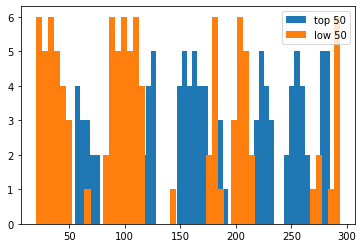

In [39]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [40]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       384
speed                                      17.1
timestamp            2022-11-21 02:35:34.559905
ETA                  2022-11-21 16:13:34.559905
error                    0 days 00:36:35.547006
remained_distance                    300.499701
Name: 160, dtype: object

In [41]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       321
speed                                      19.3
timestamp            2022-11-20 21:17:38.944059
ETA                  2022-11-21 21:35:38.944059
error                    0 days 04:45:28.837148
remained_distance                    373.629071
Name: 97, dtype: object

3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법
- 속도가 0일때는 어떻게 계산?


# 감속률 미적용

In [42]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_26.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


224


In [43]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [44]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [45]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [46]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,224,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8339,38.9635,11.5,101.0,2022-11-19 22:24:43.599696,2022-11-19 13:20:25,2022-11-19 01:07:06,under way using engine,1071.303386,1386.146465
1,225,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8521,38.9608,11.6,102.0,2022-11-19 22:29:46.266674,2022-11-19 13:25:02,2022-11-19 01:07:06,under way using engine,1069.727209,1388.920303
2,226,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8962,38.9541,11.5,101.0,2022-11-19 22:39:53.134121,2022-11-19 13:35:45,2022-11-19 01:31:06,under way using engine,1065.901997,1379.157672
3,227,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9377,38.9484,11.6,102.0,2022-11-19 22:49:57.626655,2022-11-19 13:46:03,2022-11-19 01:49:08,under way using engine,1062.327066,1379.312051
4,228,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9571,38.9454,11.6,102.0,2022-11-19 22:55:01.041397,2022-11-19 13:50:45,2022-11-19 01:49:08,under way using engine,1060.642543,1377.124888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565
305,529,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8303,35.0770,0.1,91.0,2022-11-21 20:12:03.039219,2022-11-21 10:46:03,2022-11-21 10:49:07,moored,11.983151,956.161110
306,530,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8302,35.0772,0.0,91.0,2022-11-21 20:17:05.890117,2022-11-21 10:52:05,2022-11-21 10:55:06,moored,12.004568,NaN
307,531,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8300,35.0772,0.0,91.0,2022-11-21 20:42:20.130436,2022-11-21 11:15:59,2022-11-21 11:13:06,moored,12.003097,NaN


In [47]:
stop_index = check_ATA(sample)

In [48]:
stop_index

295

In [49]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
295,519,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8326,34.9308,9.7,345.0,2022-11-21 16:50:10.106911,2022-11-21 07:29:14,2022-11-21 07:25:09,under way using engine,4.477744,5.594956
296,520,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8316,34.9334,9.7,345.0,2022-11-21 16:55:12.370789,2022-11-21 07:30:20,2022-11-21 07:31:07,under way using engine,4.174799,5.216425
297,521,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8109,34.9799,11.9,343.0,2022-11-21 17:10:24.772941,2022-11-21 07:46:50,2022-11-21 07:49:08,under way using engine,1.385139,1.818734
298,522,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7941,35.0195,12.4,341.0,2022-11-21 17:20:26.867541,2022-11-21 08:00:05,2022-11-21 07:49:08,under way using engine,6.009961,8.060099
299,523,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7889,35.0318,10.6,341.0,2022-11-21 17:25:29.125227,2022-11-21 08:04:23,2022-11-21 07:49:08,under way using engine,7.455118,9.412492
300,524,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7868,35.0597,8.2,25.0,2022-11-21 17:35:35.996969,2022-11-21 08:15:14,2022-11-21 08:13:09,under way using engine,10.450602,13.357489
301,525,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7908,35.0657,8.0,53.0,2022-11-21 17:40:38.692701,2022-11-21 08:18:19,2022-11-21 08:13:09,under way using engine,10.999747,14.165268
302,526,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8049,35.0702,7.1,75.0,2022-11-21 17:45:41.601632,2022-11-21 08:24:32,2022-11-21 08:13:09,under way using engine,11.264421,15.235716
303,527,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8218,35.0740,3.9,69.0,2022-11-21 17:55:45.279861,2022-11-21 08:34:22,2022-11-21 08:13:09,under way using engine,11.610739,24.556266
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565


In [50]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-11-21 16:50:10.106911')

In [51]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_24_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [52]:
ddd = sample.loc[20:,:]


In [53]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd.sort_values(by="error")

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
276,500,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.4930,34.4441,14.5,55.0,2022-11-21 13:26:40.543015,2022-11-21 04:15:37,2022-11-21 03:37:06,under way using engine,65.611660,98.695348,2022-11-21 18:15:40.543015,2022-11-21 16:50:10.106911,0 days 01:25:30.436104
277,501,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.5448,34.4736,14.4,55.0,2022-11-21 13:36:46.474871,2022-11-21 04:28:33,2022-11-21 04:25:09,under way using engine,60.596223,90.587952,2022-11-21 18:25:46.474871,2022-11-21 16:50:10.106911,0 days 01:35:36.367960
278,502,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.5623,34.4837,14.6,57.0,2022-11-21 13:41:49.696488,2022-11-21 04:32:56,2022-11-21 04:25:09,under way using engine,58.919267,89.184269,2022-11-21 18:30:49.696488,2022-11-21 16:50:10.106911,0 days 01:40:39.589577
279,503,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.5911,34.5003,14.4,56.0,2022-11-21 13:51:55.189929,2022-11-21 04:40:02,2022-11-21 04:37:07,under way using engine,56.201083,84.017464,2022-11-21 18:40:55.189929,2022-11-21 16:50:10.106911,0 days 01:50:45.083018
280,504,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.6247,34.5199,14.3,56.0,2022-11-21 13:56:58.085361,2022-11-21 04:48:40,2022-11-21 04:37:07,under way using engine,53.076063,78.860258,2022-11-21 18:45:58.085361,2022-11-21 16:50:10.106911,0 days 01:55:47.978450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,337,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,125.1520,35.4832,16.0,150.0,2022-11-20 22:38:21.622891,2022-11-20 13:38:08,2022-11-20 04:13:11,under way using engine,337.963801,561.094846,2022-11-22 12:46:21.622891,2022-11-21 16:50:10.106911,0 days 19:56:11.515980
114,338,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,125.1665,35.4656,15.8,150.0,2022-11-20 22:43:24.980501,2022-11-20 13:42:57,2022-11-20 04:13:11,under way using engine,336.375205,550.874224,2022-11-22 12:51:24.980501,2022-11-21 16:50:10.106911,0 days 20:01:14.873590
115,339,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,125.1810,35.4482,15.8,150.0,2022-11-20 22:48:27.035986,2022-11-20 13:47:46,2022-11-20 04:13:11,under way using engine,334.798241,548.291665,2022-11-22 12:56:27.035986,2022-11-21 16:50:10.106911,0 days 20:06:16.929075
116,340,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,125.1975,35.4282,15.9,150.0,2022-11-20 22:53:29.928590,2022-11-20 13:53:15,2022-11-20 04:13:11,under way using engine,333.010988,549.096681,2022-11-22 13:01:29.928590,2022-11-21 16:50:10.106911,0 days 20:11:19.821679


In [54]:
ddd['error'].mean()

Timedelta('0 days 08:35:56.547821876')

In [55]:
ddd['error'].max()

Timedelta('0 days 20:16:22.611541')

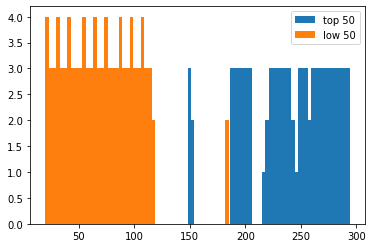

In [56]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [57]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       490
speed                                      16.9
timestamp            2022-11-21 12:36:11.950460
ETA                  2022-11-21 20:27:11.950460
error                    0 days 03:37:01.843549
remained_distance                     85.765909
Name: 266, dtype: object

In [58]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       253
speed                                      16.4
timestamp            2022-11-20 04:28:09.027197
ETA                  2022-11-22 08:42:09.027197
error                    0 days 15:51:58.920286
remained_distance                    904.478919
Name: 29, dtype: object